## Clustering: extraíndo padrões de dados
---

- A proposta é agrupar os clientes com características similares, de modo que os membros de um mesmo grupo possuem comportamentos parecidos no uso do cartão de crédito, mesmo que ainda não saibamos quais são.
- Base de dados: [Credit Card Dataset for Clustering](https://www.kaggle.com/arjunbhasin2013/ccdata)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics


In [2]:
dataframe = pd.read_csv("CC GENERAL.csv")
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True) # remover atributos que não são relevantes à primeira vista
dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [3]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [4]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [5]:
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [6]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

### Validação dos clusters
---
- Coeficiente de __Silhouette__

        s = (b - a)/max(a,b)

- sendo:
        
        - a = distancia média entre o ponto e todos os outros pontos do __mesmo cluster__;
        - b = distância média entre o ponto e todos os outros pontos do cluster mais próximo.
        - Para sabermos qual é o cluster mais próximo, deveremos tirar a média entre os pontos para os dois clusters e coletar o menor valor, e este será o mais próximo.

- Distância Euclidiana: 

        - d(A, B) = sqrt(((XB - XA) ^ 2) + ((YB - YA) ^ 2))

In [7]:
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean') # labels atribui cada um dos pontos à um cluster que foi gerado
print(silhouette) # pode considerar o valor bom, pois o silhouette varia de -1 a 1. Quanto mais próximo de 1, mais separados estão os clusters

0.3643891019677421


- Índice Davies-Bouldin

In [8]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs) # Quanto mais próximo de 0, melhor.

1.075928412708598


- Índice Calinski-Harabasz
        
        - Leva em consideração a dispersão dos pontos dentro de um cluster, tanto nos pontos dentro de um cluster específico, como entre clusters diferentes, considerando a compactação e separação também. 

In [9]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski) # Quanto maior, melhor

3431.776631279097


In [10]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [11]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088435 3526.440519908274


In [12]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36455188467993593 1.0763212675867464 3431.790972402537


In [13]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.24875806789425026 1.2022287017160478 1613.7335553073467


- Outra forma de validação é comparar os valores que obtemos do nosso dataset com outros de um banco de dados aleatório. A ideia é que possamos garantir que nosso conjunto de dados apresente melhores métricas, e por conseguinte, uma estrutura capaz de ser clusterizada.

- Para isso, geraremos um conjunto de dados aleatório com valores entre 0 e 1, que são os valores que temos. Utilizaremos a mesma quantidade de variáveis, isto é, 16, e a mesma quantidade de instâncias.

In [14]:
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.040325834451706725 3.522712862083915 306.34621986801426
0.36455188467993593 1.0763212675867464 3431.790972402537


- Próximo passo é validar a estabilidade do cluster.
- A ideia é que dividamos a base de dados e executemos o kmeans para cada uma dessas divisões a fim de obtermos resultados similares para as métricas, pois queremos que o kmeans se comporte similarmente em cada uma para conseguirmos a validação. 

In [15]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs2, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs2, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

# As métricas não variaram muito, então nosso dataset está bem estável, mesmo dividindo em 3 partes.

0.36892760732667484 1.1429078910189432 1204.1009094357971
0.35330293159568216 1.1429078910189432 1194.9362210429613
0.36701699621251116 1.0981564426373072 1167.51138932431


### Gerando Gráficos
---

In [16]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

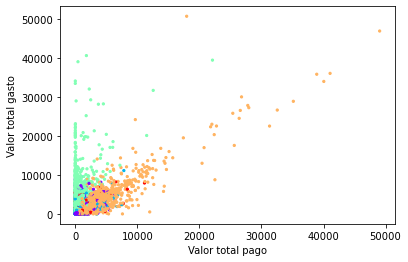

In [27]:
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')
plt.show()

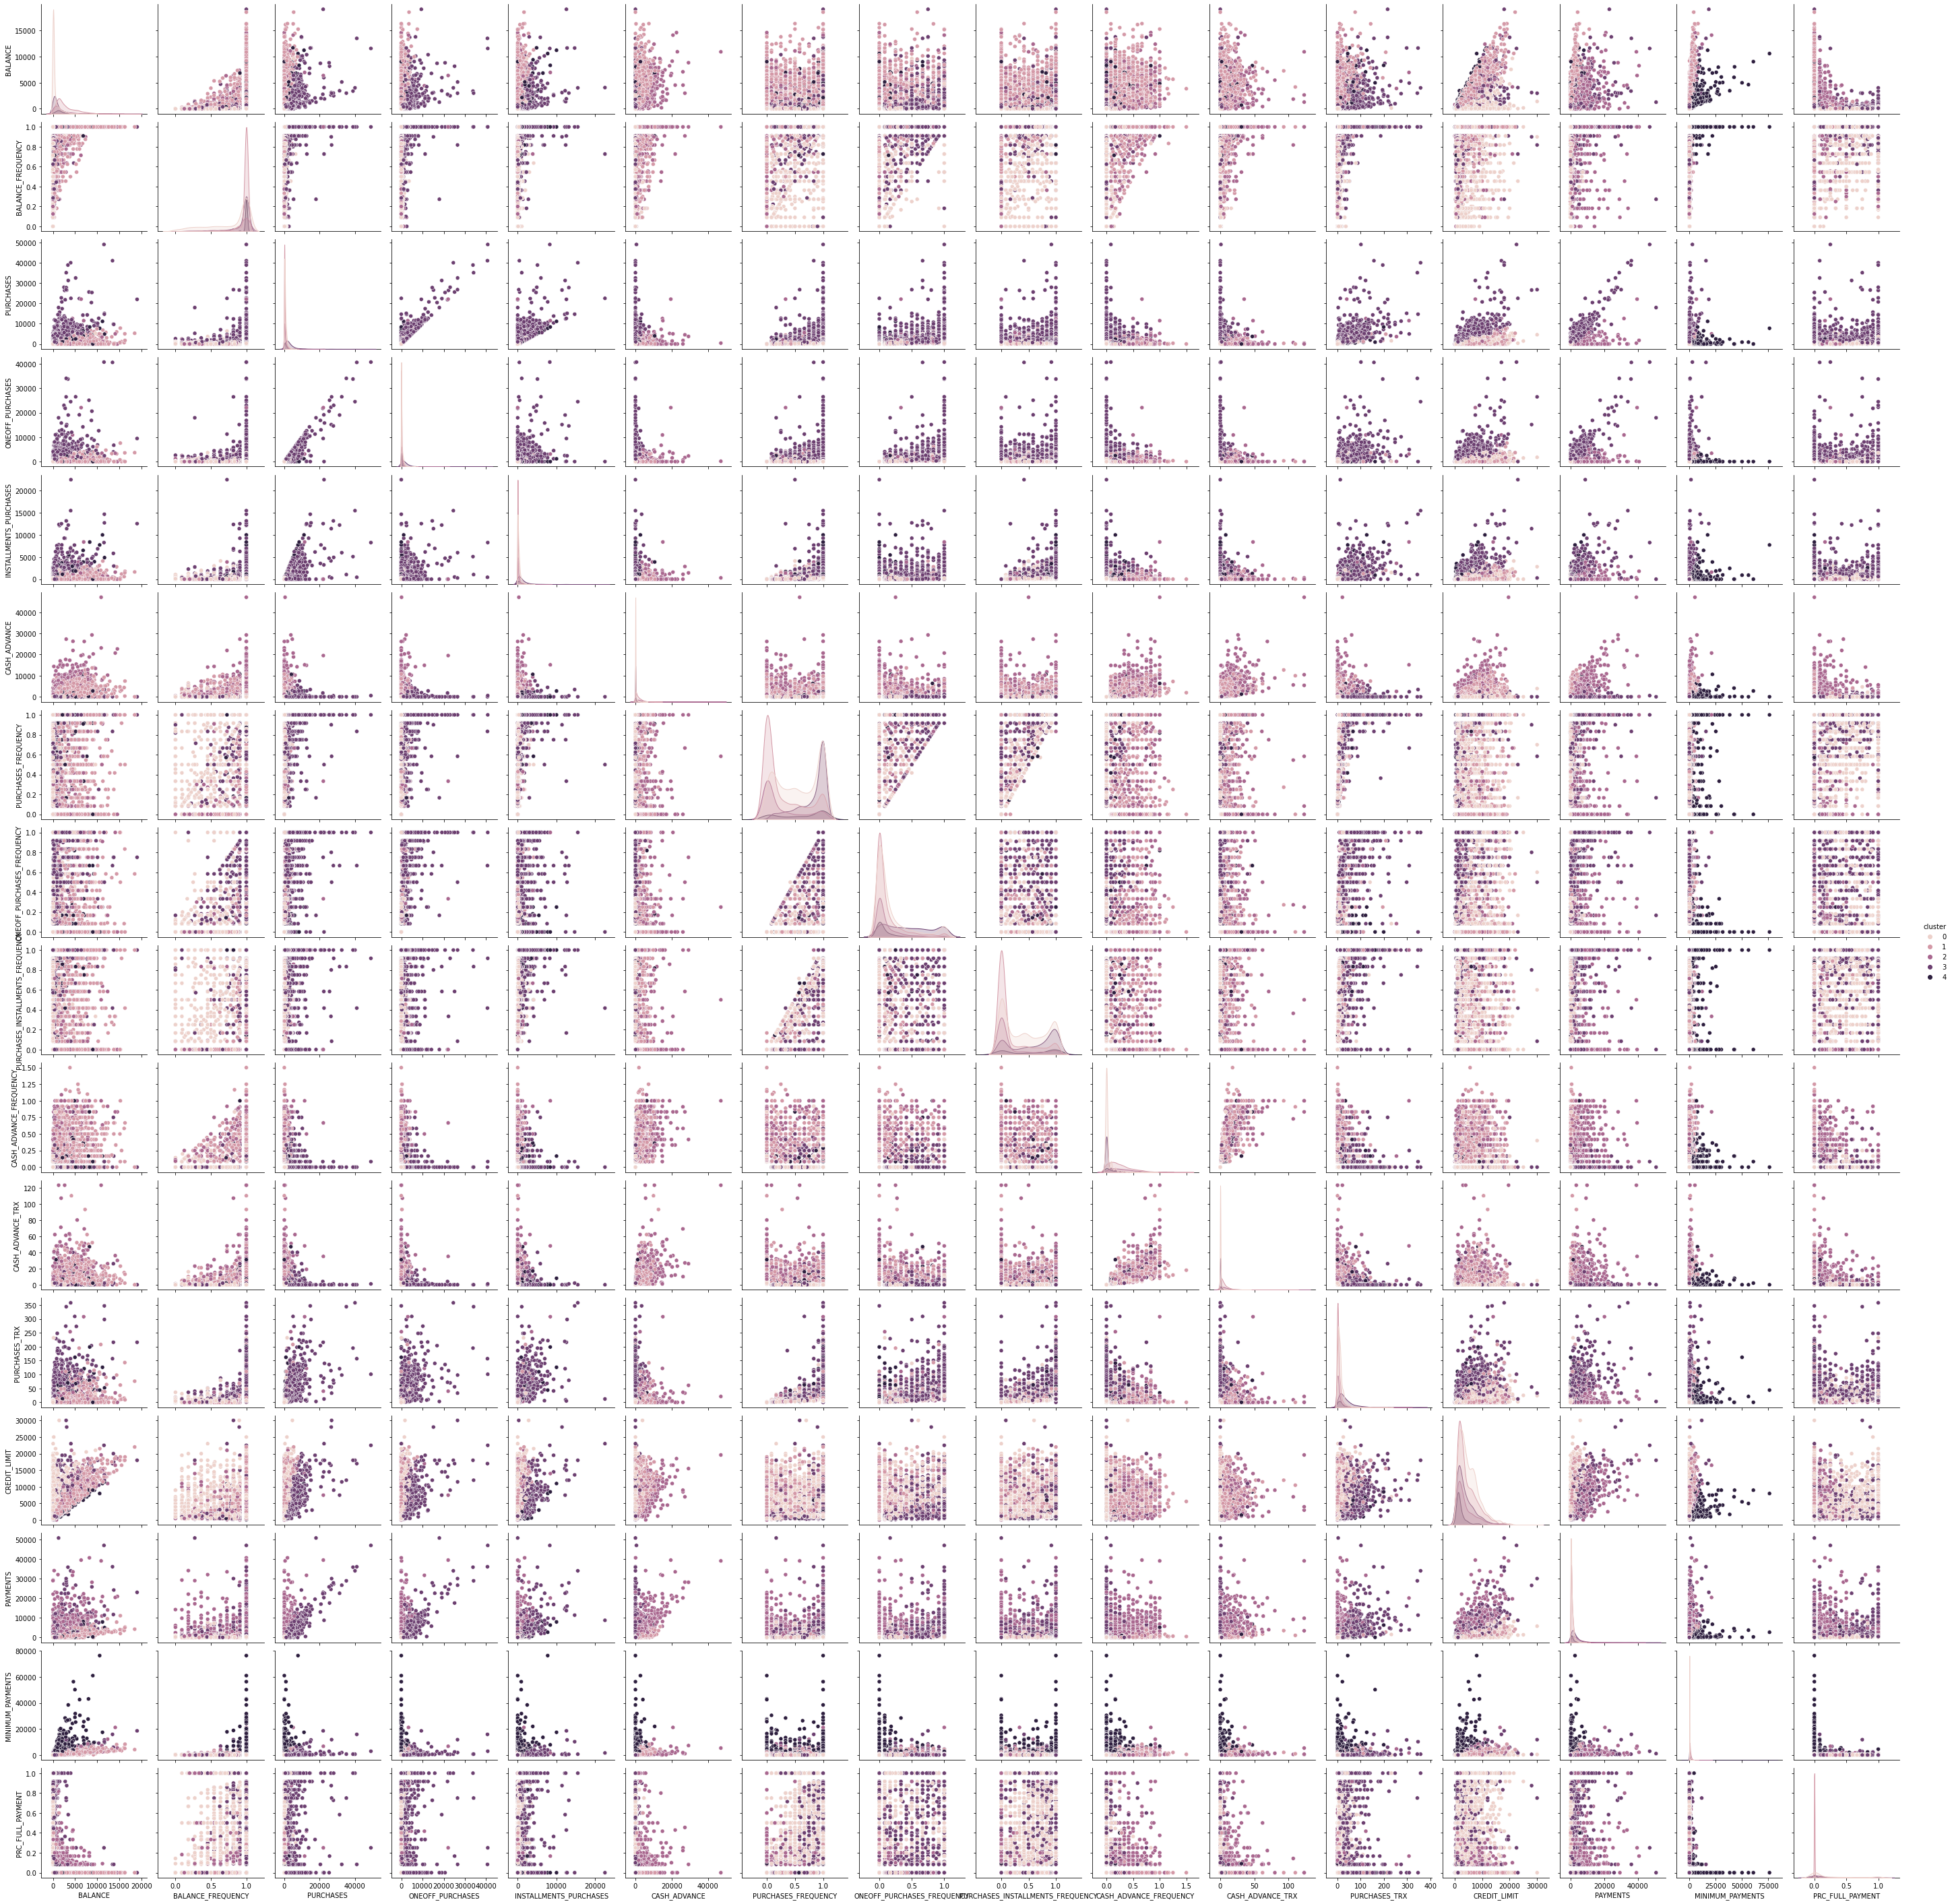

In [23]:
dataframe['cluster'] = labels
sns.pairplot(dataframe[0:], hue='cluster') # visualização muito difícil!

In [28]:
dataframe.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3275.0   444.146902   846.930394   0.000000    23.283648   
1        2647.0  3034.218419  2476.008276   6.824905  1255.640662   
2        1072.0  1794.024195  1982.950586   0.000000   506.925348   
3        1544.0  1148.959844  1680.498652   0.000000   210.375599   
4         412.0  1987.146873  1852.215743  70.794108  1020.146724   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.980060   410.659944   9630.367575            3275.0  0.774211   
1        2173.970603  4223.380343  18495.558550            2647.0  0.963713   
2        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
3         554.332740  1370.859355  19043.138560            1544.0  0.928239   
4        1338.918346  2133.415063  11670.179850             412.0  0.989512   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.968369   4483.503862           3275.0  0.246368   
1        ...      1330.279644   8345.641905           2647.0  0.001800   
2        ...       884.718306  21235.065300           1072.0  0.117384   
3        ...       524.184580  18621.013310           1544.0  0.278724   
4        ...      7086.774783  76406.207520            412.0  0.019271   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346480  0.0  0.0  0.000000  0.444444  1.0  
1        0.023269  0.0  0.0  0.000000  0.000000  0.6  
2        0.186853  0.0  0.0  0.083333  0.142857  1.0  
3        0.367326  0.0  0.0  0.083333  0.545455  1.0  
4        0.090795  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [30]:
centroids = kmeans.cluster_centers_
centroids

array([[6.91174009e-02, 2.30606539e-04, 1.21226581e-01, 4.79772863e-02,
        7.33497068e-02, 2.41947578e-02, 1.72617514e-04, 3.36929404e-05,
        1.40042773e-04, 7.92242513e-06, 1.23760508e-04, 2.85805113e-03,
        9.43803334e-01, 1.53494462e-01, 5.68407863e-02, 7.58440293e-05],
       [5.04105094e-01, 2.72167105e-04, 6.15438810e-02, 3.61370321e-02,
        2.54285784e-02, 2.53309289e-01, 6.71965307e-05, 2.56845751e-05,
        4.49251577e-05, 5.74947541e-05, 1.15819794e-03, 1.32736701e-03,
        7.19252474e-01, 1.66035311e-01, 1.79161221e-01, 5.52720859e-07],
       [2.35141479e-01, 2.16555293e-04, 6.03857074e-02, 3.44170171e-02,
        2.59739049e-02, 4.00128071e-01, 5.26401668e-05, 2.04882397e-05,
        3.51921361e-05, 6.54864556e-05, 1.57199032e-03, 1.12217156e-03,
        5.35089146e-01, 5.98040052e-01, 1.04348171e-01, 2.77498236e-05],
       [1.59970277e-01, 2.45420653e-04, 4.37832758e-01, 2.56342445e-01,
        1.81661269e-01, 2.57701902e-02, 2.04632150e-04, 8.878

- Como analisaremos a variância, buscaremos um atributo em que os valores sejam diferentes entre os clusters, pois assim ampliamos a chance de observar as particularidades de cada grupo.

- Por exemplo, podemos ver que temos clientes que gastam muito em um cluster, e em outro, que gastam pouco. Mas pode ser que haja algum outro atributo em que a diferença não seja não impactante e não nos ajudará na interpretação, e inclusive atrapalhe.

- Porém, não precisaremos fazer isso visualmente e calcular manualmente, então usaremos o cálculo da variância, conforme aprendemos nas aulas de validação.

- Aqueles atributos que possuírem a maior variância serão os utilizados.

In [38]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i], ":", "{:.4f}".format(centroids[:, i].var()))

BALANCE : 0.0224
BALANCE_FREQUENCY : 0.0000
PURCHASES : 0.0196
ONEOFF_PURCHASES : 0.0076
INSTALLMENTS_PURCHASES : 0.0036
CASH_ADVANCE : 0.0226
PURCHASES_FREQUENCY : 0.0000
ONEOFF_PURCHASES_FREQUENCY : 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY : 0.0000
CASH_ADVANCE_FREQUENCY : 0.0000
CASH_ADVANCE_TRX : 0.0000
PURCHASES_TRX : 0.0000
CREDIT_LIMIT : 0.0360
PAYMENTS : 0.0280
MINIMUM_PAYMENTS : 0.0541
PRC_FULL_PAYMENT : 0.0000


### Atributos à serem utilizados:
BALANCE : 0.0224<br>
PURCHASES : 0.0196<br>
CASH_ADVANCE : 0.0226<br>
CREDIT_LIMIT : 0.0360<br>
PAYMENTS : 0.0280<br>

In [41]:
description = dataframe.groupby('cluster')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

/tmp/ipykernel_2117/1956269875.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby('cluster')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']


BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         444.146902   628.970831    141.666342   5135.052448   814.094493   
1        3034.218419   381.722765   1638.154020   4489.875331   966.280942   
2        1794.024195   475.494823   3270.246792   3976.372399  4709.556601   
3        1148.959844  3267.501781    182.614490   4107.357611  3035.900502   
4        1987.146873   858.326286    420.107194   2226.699029  1338.974045   

         n_clients  
cluster             
0             3275  
1             2647  
2             1072  
3             1544  
4              412

CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.<br>
CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.<br>
CLUSTER 2: Clientes que gastam muito com saques. Pagam as vezes.<br>
CLUSTER 3: Clientes que gastam muito com compras. Melhores pagadores.<br>
CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.<br>

In [42]:
dataframe.groupby('cluster')['PRC_FULL_PAYMENT'].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        3275.0  0.246368  0.346480  0.0  0.0  0.000000  0.444444  1.0
1        2647.0  0.001800  0.023269  0.0  0.0  0.000000  0.000000  0.6
2        1072.0  0.117384  0.186853  0.0  0.0  0.083333  0.142857  1.0
3        1544.0  0.278724  0.367326  0.0  0.0  0.083333  0.545455  1.0
4         412.0  0.019271  0.090795  0.0  0.0  0.000000  0.000000  1.0

- Como podemos utilizar os clusters que geramos na prática? Descrevemos os padrões e caracterizamos cada grupo, mas de que forma esses dados serão aplicados?

- Uma ideia é aplicar uma estratégia de negócio em um dos grupos com o objetivo de aumentar o arrecadamento de dinheiro.

- O grupo mais adequado para isso seria o cluster 0, afinal ele possui o maior número de clientes, são bons pagadores, bom limite de crédito, mas gastam pouco. Nossa ideia é engajar esse grupo para que ele utilize mais o cartão de crédito.

- Outro grupo interessante para aumento de lucros é o cluster 3, afinal gastam muito com compras e são os melhores pagadores. Eles não possuem um limite de crédito alto, mas uma forma de incentivar ainda mais o uso do cartão de crédito é aumentar gradativamente o limite desse grupo.

- Para o grupo de apresenta os piores pagadores, teríamos de estruturar outro tipo de estratégia.
---

- Trabalharemos com o cluster 0. Queremos que esses clientes gastem mais para incentivar o lucro na empresa. Suponhamos que a estratégia seja fazer uma parceria com uma empresa de pontos que forneça benefícios para o cliente que usar mais o crédito.

- Para verificarmos se a nossa estratégia foi eficaz e utilizamos o grupo certo, faremos o chamado teste AB. Dividiremos o os clientes do cluster 0 em dois grupos: o grupo de controle e o grupo de teste.

- O grupo de controle permanecerá sem nenhuma modificação, ou seja, não haverá programa de pontos. Já o grupo de teste, em um período definido, receberá o programa de pontos.

- Ao final do período, verificaremos se as pessoas que participaram do programa de pontos gastaram mais com o cartão ou não. Assim teremos um resultado confiável, com clientes com características similares.